## Assignment A2a: Signal Detection

### John Mays (jkm100)

### 1. Generating signals with events and additive noise

### 1a. Signals in Gaussian noise

In [89]:
# Appropriate Imports:
import A2a_code
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)


In [86]:
def genwaveform (N=100, alpha=0.4, A=1, sigma=1.0, noisetype="Gaussian"):
    signal = []
    event_locations = []
    for i in range(N):
        if noisetype == "Gaussian":
            noise_val = np.random.normal(scale=sigma)
        elif noisetype == "uniform":
            noise_val = np.random.uniform(low=-sigma/2, high=sigma/2)
        if (np.random.uniform(low=0.0, high=1.0) < alpha):
            signal_val = A
            event_locations.append(i)
        else:
            signal_val= 0
        signal.append(signal_val + noise_val)
    return signal, event_locations

In [87]:
def plot_waveform(signal, event_locations = [], title = "Signal with Noise"):
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(range(len(signal)), signal, label="waveform")
    plt.vlines(event_locations, ymin=np.min(signal), ymax=np.max(signal), colors="#a3a3ff", label="event")
    plt.title(title)
    plt.ylabel("Amplitude")
    plt.xlabel("Index")
    plt.legend()
    plt.show()

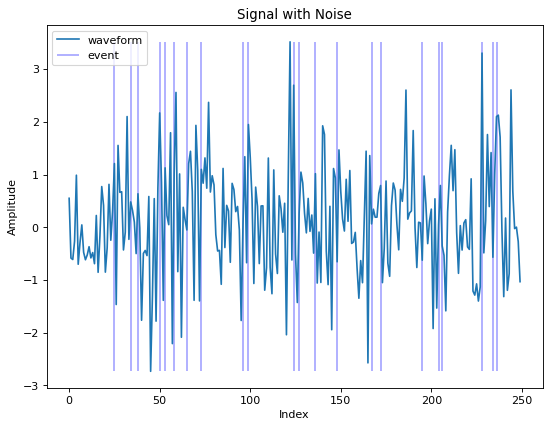

In [63]:
signal, event_locations = genwaveform(N= 250, A=1, alpha=0.1)
plot_waveform(signal, event_locations)

### 1b. Signals in uniform noise

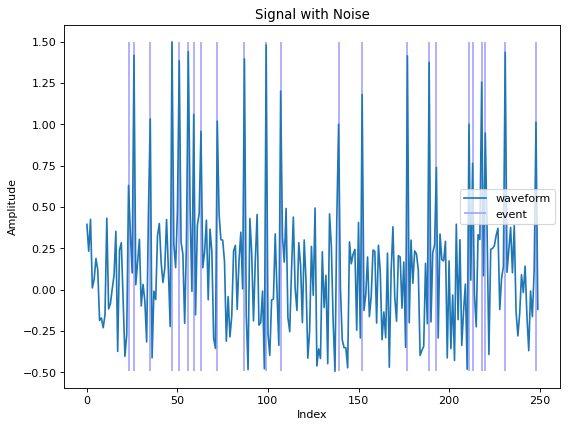

In [65]:
signal, event_locations = genwaveform(N= 250, A=1, alpha=0.1, noisetype="uniform")
plot_waveform(signal, event_locations)

### 1c. Notation

#### 1)

#### 2)
$$p(y(t)) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(y(t)-\mu)^{2}}{2\sigma^{2}}}$$

### 1d. Conditional Probability

Given there is a signal present at time $t$ with amplitude $A$, the probability can be expressed as a sum of the pdf of the noise, which I will assume is normal noise here, and the amplitude, $A$:
$$p(y(t)|\text{signal is present}) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(y(t)-\mu)^{2}}{2\sigma^{2}}}+A$$

## 2. Signal detection

### 2a. Effect of parameters on detection probability

With respect to noise, we must consider
- Noise parameter $\sigma$, the standard deviation
- type of noise

With respect to Gaussian noise specifically, $\sigma$ is important, because it essentially determines the range of values/intensities one is likely to see from noise.  A small $\sigma$ will result in a tighter range of noise values, which will make the signal values stand out more, while a large $\sigma$ can result in a much larger range of noise values that can completely drown out a sigma.

Here is a waveform where the noise has a very small $\sigma$:

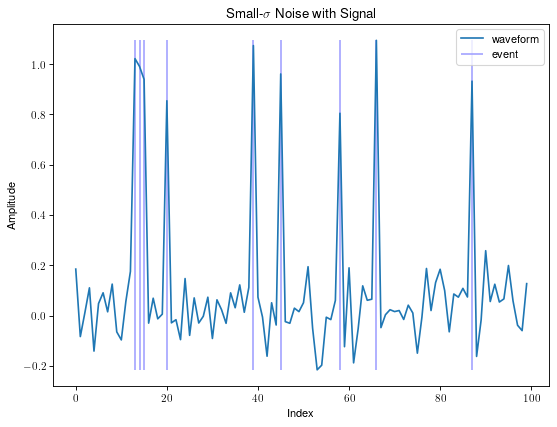

In [94]:
signal_small_sigma, event_locations_small_sigma = genwaveform(N=100, alpha=0.10, sigma=0.1)
plot_waveform(signal_small_sigma, event_locations_small_sigma, title="Small-$\sigma$ Noise with Signal")


Here is a waveform where the noise has a very large $\sigma$ and all of the other parameters are the same:

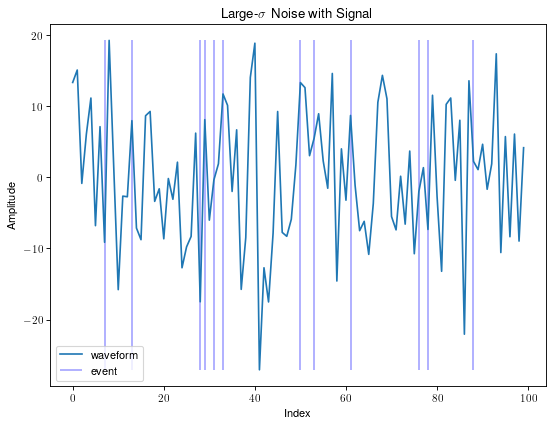

In [95]:
signal_large_sigma, event_locations_large_sigma = genwaveform(N=100, alpha=0.10, sigma=10)
plot_waveform(signal_large_sigma, event_locations_large_sigma, title="Large-$\sigma$ Noise with Signal")

One will notice that in the example with a small $\sigma$, the peaks stand out as very obvious.  In the example with a large $\sigma$, the highest peaks do not even belong to the events.

Therefore a larger $\sigma$ makes a signal less detectable.

$$\boxed{\lim_{\sigma \rightarrow \infty}p(\text{detection})=0\text{, and} \lim_{\sigma \rightarrow 0}p(\text{detection})=1}$$

As for type of noise, it is difficult to make a comparison between uniform noise and Gaussian (normal) noise.  The $\sigma$ parameter controls range on both of them such that as $\sigma$ becomes greater, so does the range, but it does so much differently.  But for the most part, the same observations above would also be just as true with uniform noise.

With respect to the signal, we must consider
- the amplitude of the signal, $A$.
- the signal probability $\alpha$

The amplitude of the signal, $A$, makes the signal much more distinguishable from noise as it becomes larger.  Conversely, as it gets lower, the probability of successful detection becomes lower.

Here are two graphs to illustrate this:

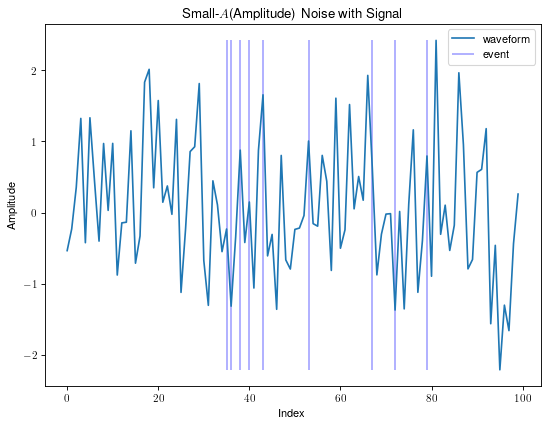

In [97]:
signal_small_amplitude, event_locations_small_amplitude = genwaveform(N=100, alpha=0.10, A = 0.1, sigma=1)
plot_waveform(signal_small_amplitude, event_locations_small_amplitude, title="Small-$A$(Amplitude) Noise with Signal")

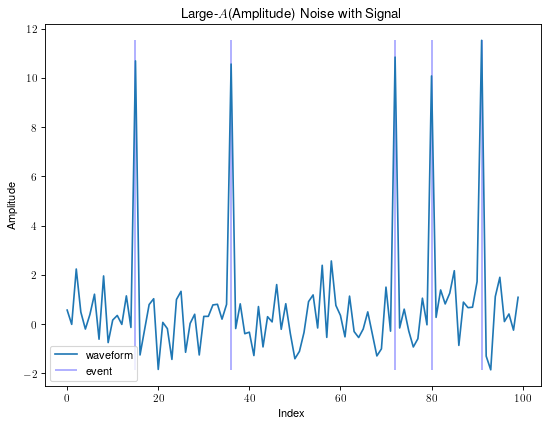

In [98]:
signal_large_amplitude, event_locations_large_amplitude = genwaveform(N=100, alpha=0.10, A = 10.0, sigma=1)
plot_waveform(signal_large_amplitude, event_locations_large_amplitude, title="Large-$A$(Amplitude) Noise with Signal")

The signal events in the waveform with large $A$ are much more distinguishable from the noise than those from the waveform with small $A$.  Therefore,

$$\boxed{\lim_{A \rightarrow 0}p(\text{detection})=0\text{, and} \lim_{A \rightarrow \infty}p(\text{detection})=1}$$

The last parameter to mention is signal probability $\alpha$.  While it could be argued that it does not matter to the detection probability in a lot of scenarions, if the signal is more sparse, and the amplitude of the signal does not necessarily seem out of the typical range for the noise, then if the peaks are more sparse, it would be easier for an algorithm to consistently dismiss them as outliers for the noise distribution.  However, if the signal occurred more often, it might stand out as abnormal to the noise distribution and therefore be detected more often by an algorithm (which would not necessarily only employ thresholding).

### 2b. Types of detections and detection errors

In [103]:
def dectectioncounts(si=[], y=[], thresh=1.0):
    tp, fn, fp, tn = 0, 0, 0, 0
    for i in range(len(y)):
        if i in si:
            signal = True
        else:
            signal = False
        if y[i] >= thresh:
            detection = True
        else:
            detection = False
        
        if signal and detection:
            tp += 1
        elif signal and not detection:
            fn += 1
        elif not signal and detection:
            fp += 1
        else:
            tn += 1
    return (tp, fn, fp, tn)

In [ ]:
def plot_detectioncounts(signal, tp, fn, fp, tn):
    

### 2c. Detection probabilities

## ROC curves

### 3a. Threshold considerations

### 3b. ROC plot